In [1]:
import sys
sys.path.insert(1, '../../ana_tools')
import getters, tools, graphic_tools, setters
import matplotlib.pyplot as plt
plt.style.use('../../ana_tools/presentation.mplstyle')
import numpy as np
path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
plateaus = getters.get_plateaus()
rtdcalib = getters.get_rtdcal()

/eos/home-i01/j/jcapotor/SWAN_projects/FBG_TMS
/eos/home-i01/j/jcapotor/SWAN_projects/FBG_TMS/ana_tools/plateaus.json
/eos/home-i01/j/jcapotor/SWAN_projects/FBG_TMS
/eos/home-i01/j/jcapotor/SWAN_projects/FBG_TMS/ana_tools/rtd_calib.json


In [2]:
def line(x, A, B):
    return A + B*x

# Description of the 2023 February Runs #

The objective of this notebook is to characterise the setups used for the runs taken during February 2023 at the IFIC facilities.

In this notebook **only information about the setup will be found.** Here we will explain in detail the characteristics of the setup, mainly focusing on the position of the RTD sensors.
## Climatic Chamber, IFIC ##

Two different setups can be differentiated during February. We have two covers for the copper cylinder, one that is made out of polystyrene and another one that is a copper lid.

* 20230221: Polystyrene lid.

* 20230222: Polystyrene lid.

* 20230223: Copper lid.

* 20230224: Copper lid.

## 20230221 ##
# Description of the setup #
The 20230221 setup description can be found below:
* Only two RTDs were connected: RTD1 and RTD2.
* RTD1 was placed on the top position, close to the top of the cylinder.
* RTD2 was placed just behind the FBGs, close to the bottom part of the copper cylinder.

Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 19.79it/s]


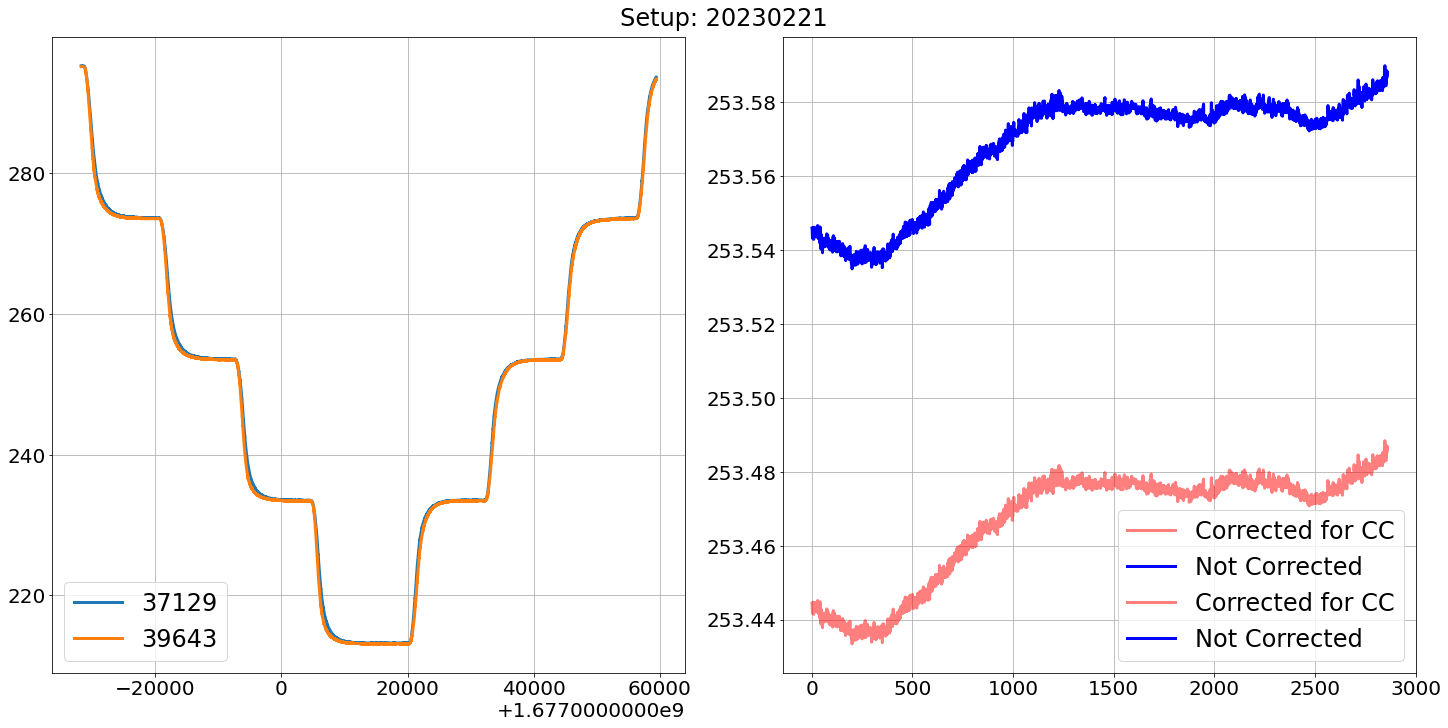

In [13]:
date = "20230221"
ids = {"T1":"37129", "T2":"39643"}
colors = {"T1":"blue", "T2":"orange", "T3":"red", "T4":"green", "T5":"purple", "T6":"black"}
ref = "T2"
def plot_temperature_profile(date, ids, t0):
    rtds = getters.get_raw_data(path_to_split=path+date+"/",
                                filetype="temperature",
                                pol="Temp").sort_values(by="Timestamp").reset_index(drop=True)
    fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
    fig.set_size_inches(20, 10)
    fig.suptitle("Setup: " + date)
    for sens in ids.keys():
        axes[0].plot(rtds["Timestamp"], rtds[sens], label=ids[sens])
        for plateau in plateaus[date].keys():
            if plateau != "253_up":
                continue
            t0 = plateaus[date][plateau][0] + t0
            tf = plateaus[date][plateau][1]
            tcut = rtds.loc[(rtds["Timestamp"]>t0)&(rtds["Timestamp"]<tf)]
            cc = line(int(plateau.split("_")[0]), rtdcalib[ids[ref]][ids[sens]][0], rtdcalib[ids[ref]][ids[sens]][1])
            axes[1].plot(tcut["Timestamp"]-t0, tcut[sens] - cc, color="red", alpha=0.5, label="Corrected for CC")
            axes[1].plot(tcut["Timestamp"]-t0, tcut[sens], color="blue", label="Not Corrected")
    axes[0].legend()
    axes[1].legend()
plot_temperature_profile(date, ids, 8000)

Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 20.46it/s]
No handles with labels found to put in legend.


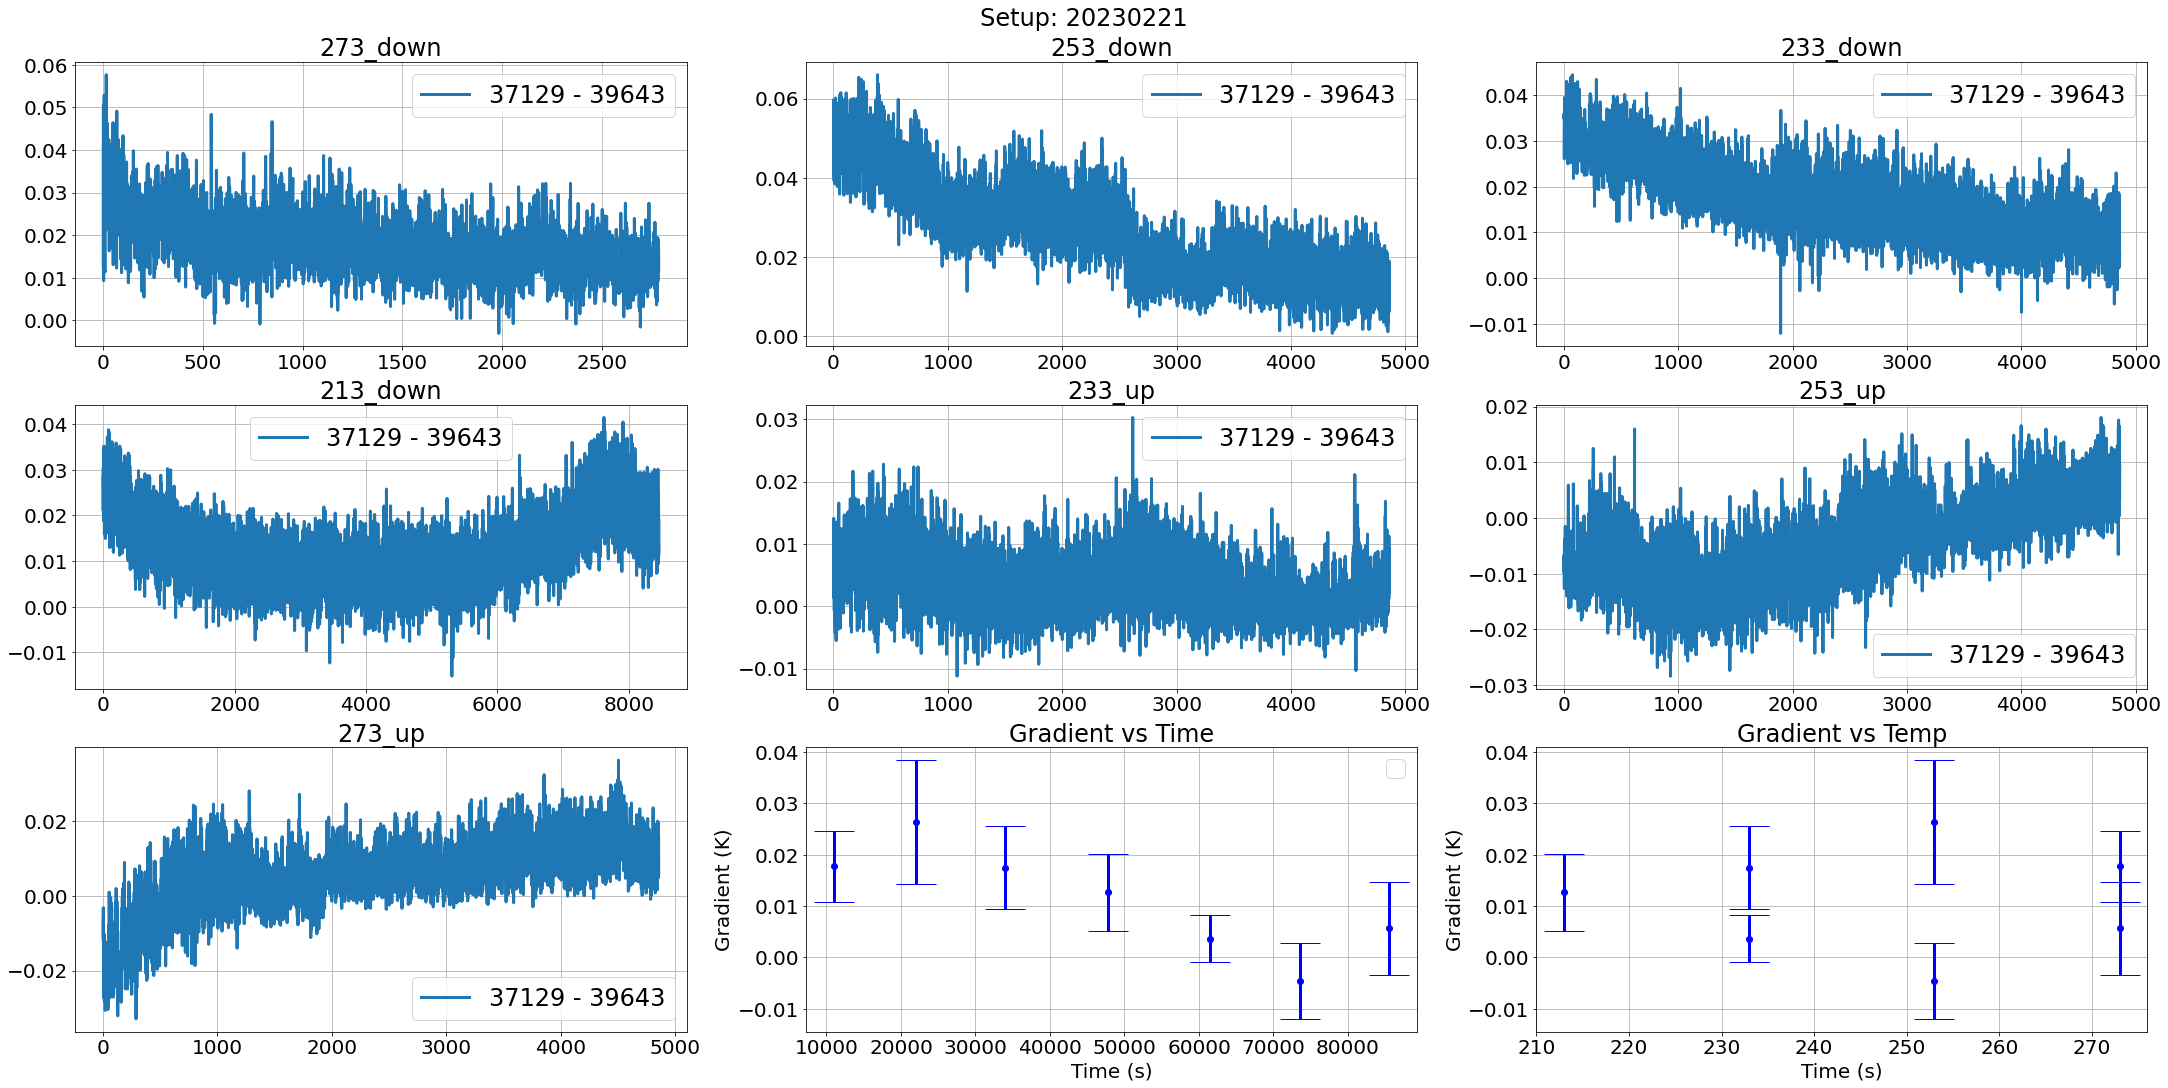

In [16]:
date = "20230221"
ids = {"T1":"37129", "T2":"39643"}
def plot_temperature_plateau(date, ids):
    rtds = getters.get_raw_data(path_to_split=path+date+"/",
                                filetype="temperature",
                                pol="Temp").sort_values(by="Timestamp").reset_index(drop=True)
    fig, axes = graphic_tools.make_figure(ncols=3, nrows=3)
    fig.set_size_inches(30, 15)
    fig.suptitle("Setup: " + date)
    cnt = 0
    ref = "T2"
    for plateau in plateaus[date]:
        for sens in ids.keys():
            if sens == ref:
                continue
            if plateau != "273_down":
                t0 = plateaus[date][plateau][0] + 6000
                tf = plateaus[date][plateau][1]
            else:
                t0 = plateaus[date][plateau][0]
                tf = plateaus[date][plateau][1]
            tcut = rtds.loc[(rtds["Timestamp"]>t0)&(rtds["Timestamp"]<tf)]
            cc = line(int(plateau.split("_")[0]), rtdcalib[ids[ref]][ids[sens]][0], rtdcalib[ids[ref]][ids[sens]][1])
            axes[cnt].plot(tcut["Timestamp"]-t0, tcut[sens]-tcut[ref] - cc, label=ids[sens] + " - " + ids[ref])
            axes[8].errorbar(int(plateau.split("_")[0]), np.mean(tcut[sens]-tcut[ref] - cc),
                             linestyle="-.", fmt="o",
                             yerr=np.std(tcut[sens]-tcut[ref] - cc), color="blue", capsize=20)
            axes[7].errorbar(np.mean(tcut["Timestamp"]-rtds["Timestamp"][0]),
                             np.mean(tcut[sens]-tcut[ref] - cc),
                             linestyle="-.", fmt="o",
                             yerr=np.std(tcut[sens]-tcut[ref] - cc), color="blue", capsize=20)
        axes[cnt].set_title(plateau)
        axes[cnt].legend()
        axes[7].set_title("Gradient vs Time")
        axes[7].set_xlabel("Time (s)")
        axes[7].set_ylabel("Gradient (K)")
        axes[8].set_xlabel("Time (s)")
        axes[8].set_title("Gradient vs Temp")
        axes[8].set_ylabel("Gradient (K)")
        cnt += 1
    axes[7].legend()
plot_temperature_plateau(date, ids)

## 20230222 ##
# Description of the setup #
The 20230222 setup description can be found below:
* Only two RTDs were connected: RTD1 and RTD2.
* RTD1 was placed on the top position, close to the top of the cylinder.
* RTD2 was placed just behind the FBGs, close to the bottom part of the copper cylinder.

Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 16.63it/s]
No handles with labels found to put in legend.


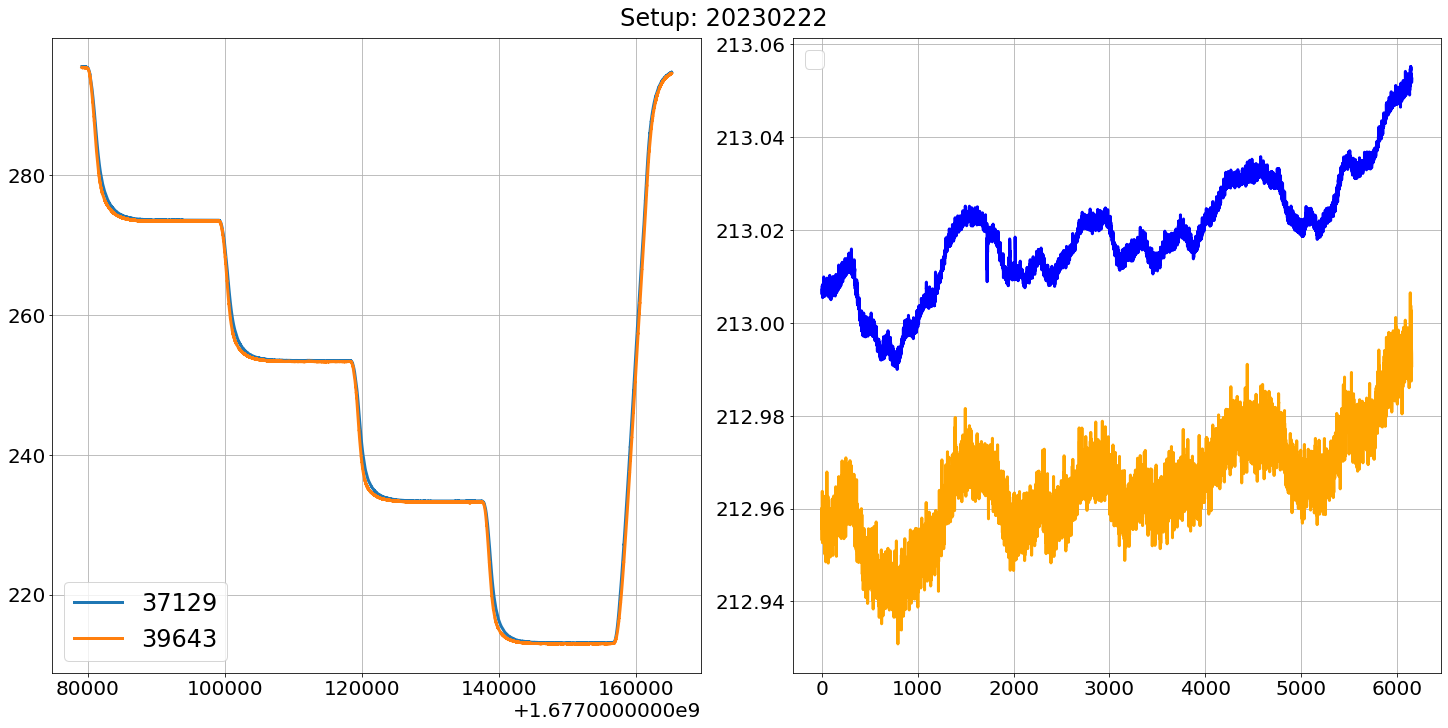

In [20]:
date = "20230222"
ids = {"T1":"37129", "T2":"39643"}
colors = {"T1":"blue", "T2":"orange", "T3":"red", "T4":"green", "T5":"purple", "T6":"black"}
ref = "T2"
def plot_temperature_profile(date, ids):
    rtds = getters.get_raw_data(path_to_split=path+date+"/",
                                filetype="temperature",
                                pol="Temp").sort_values(by="Timestamp").reset_index(drop=True)
    fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
    fig.set_size_inches(20, 10)
    fig.suptitle("Setup: " + date)
    for sens in ids.keys():
        axes[0].plot(rtds["Timestamp"], rtds[sens], label=ids[sens])
        for plateau in plateaus[date].keys():
            if plateau != "213_down":
                continue
            t0 = plateaus[date][plateau][0] + 8000
            tf = plateaus[date][plateau][1] - 250
            tcut = rtds.loc[(rtds["Timestamp"]>t0)&(rtds["Timestamp"]<tf)]
            cc = line(int(plateau.split("_")[0]), rtdcalib[ids[ref]][ids[sens]][0], rtdcalib[ids[ref]][ids[sens]][1])
            axes[1].plot(tcut["Timestamp"]-t0, tcut[sens] - cc, color=colors[sens])
    axes[0].legend()
    axes[1].legend()
plot_temperature_profile(date, ids)

Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 19.66it/s]
No handles with labels found to put in legend.


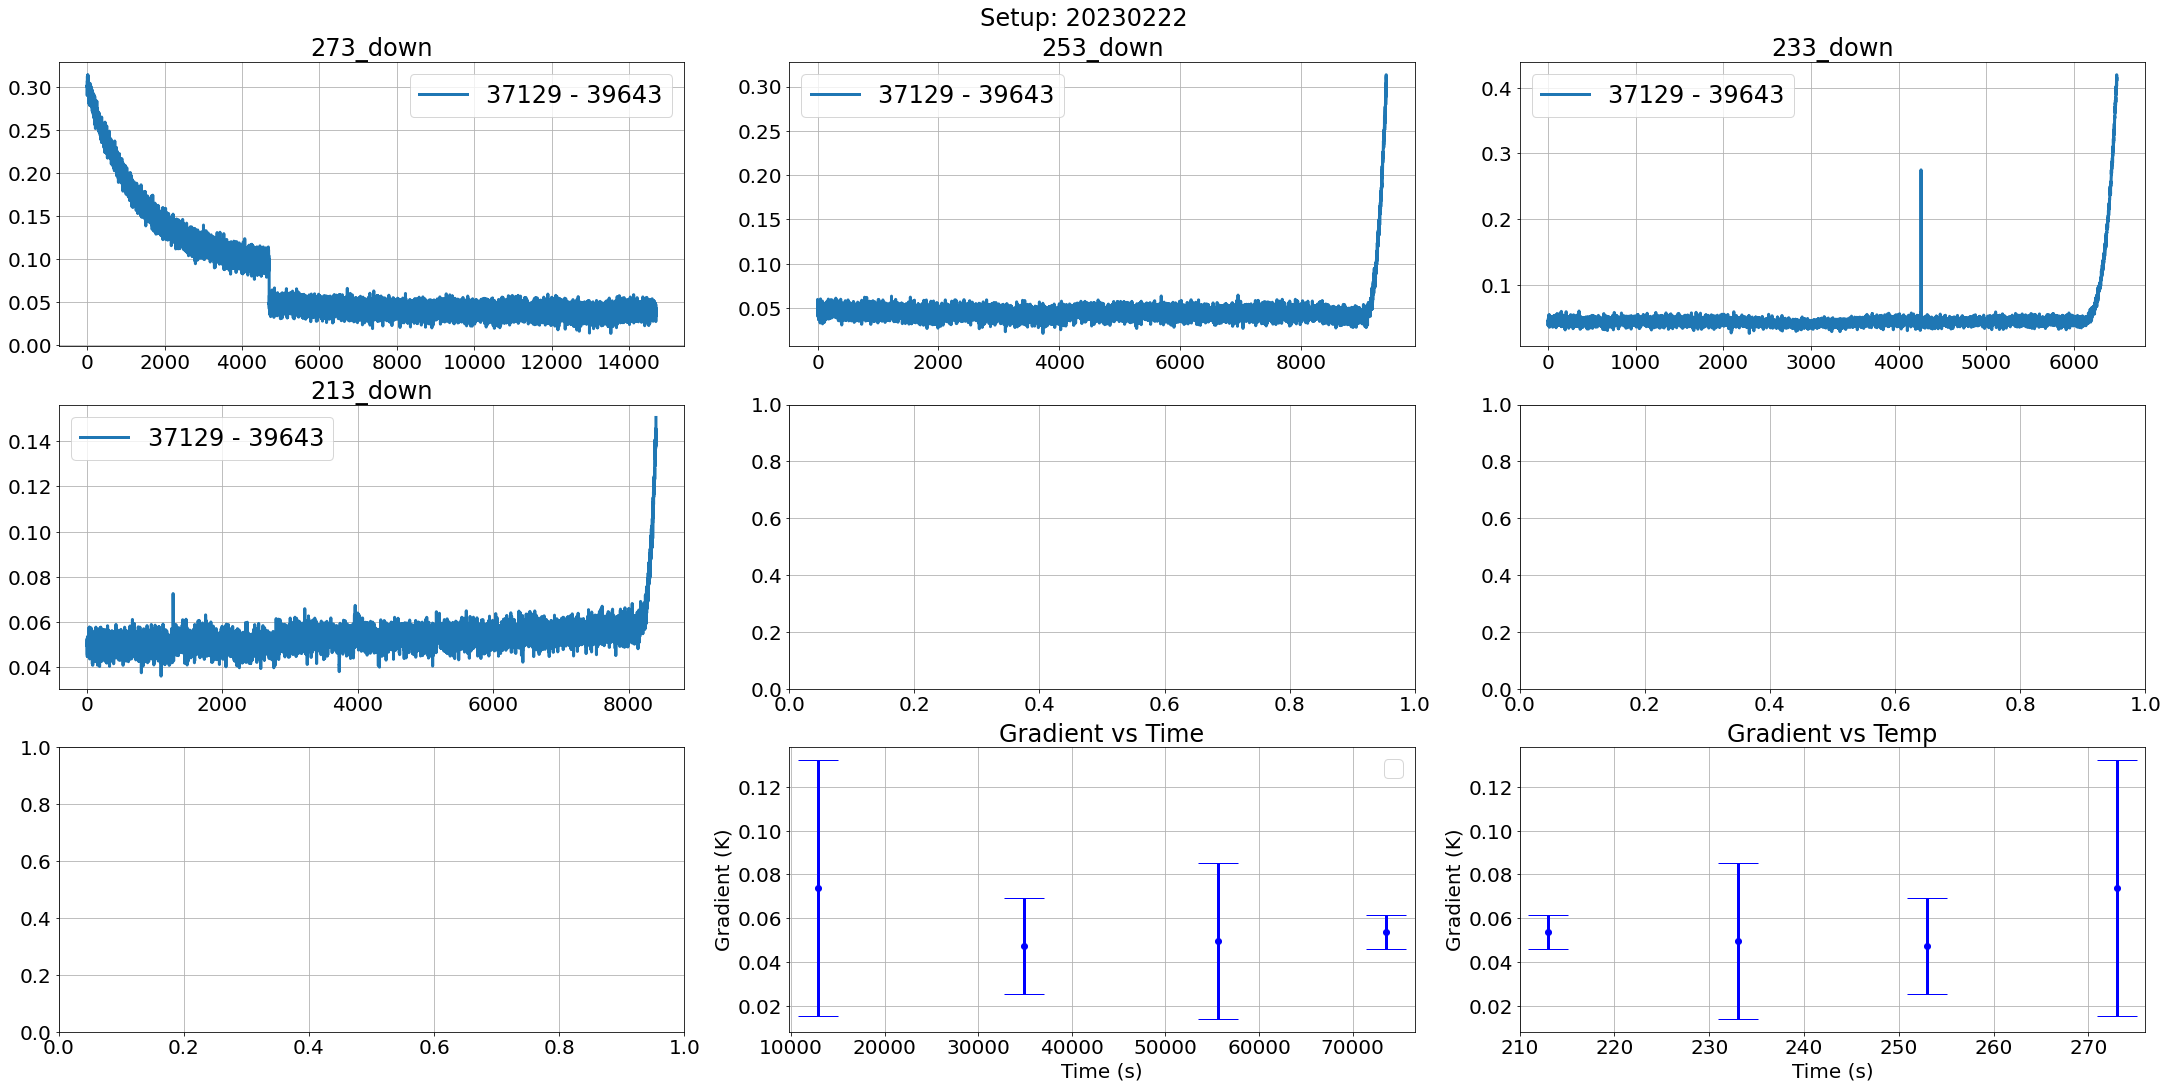

In [21]:
date = "20230222"
ids = {"T1":"37129", "T2":"39643"}
plot_temperature_plateau(date, ids)

## 20230223 ##
# Description of the setup #
The 20230223 setup description can be found below:
* A total of 6 RTDs were connected.
* RTD1 was placed on the top position, close to the top of the cylinder.
* RTD2 was placed just behind the FBGs, close to the bottom part of the copper cylinder.

Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 48.41it/s]


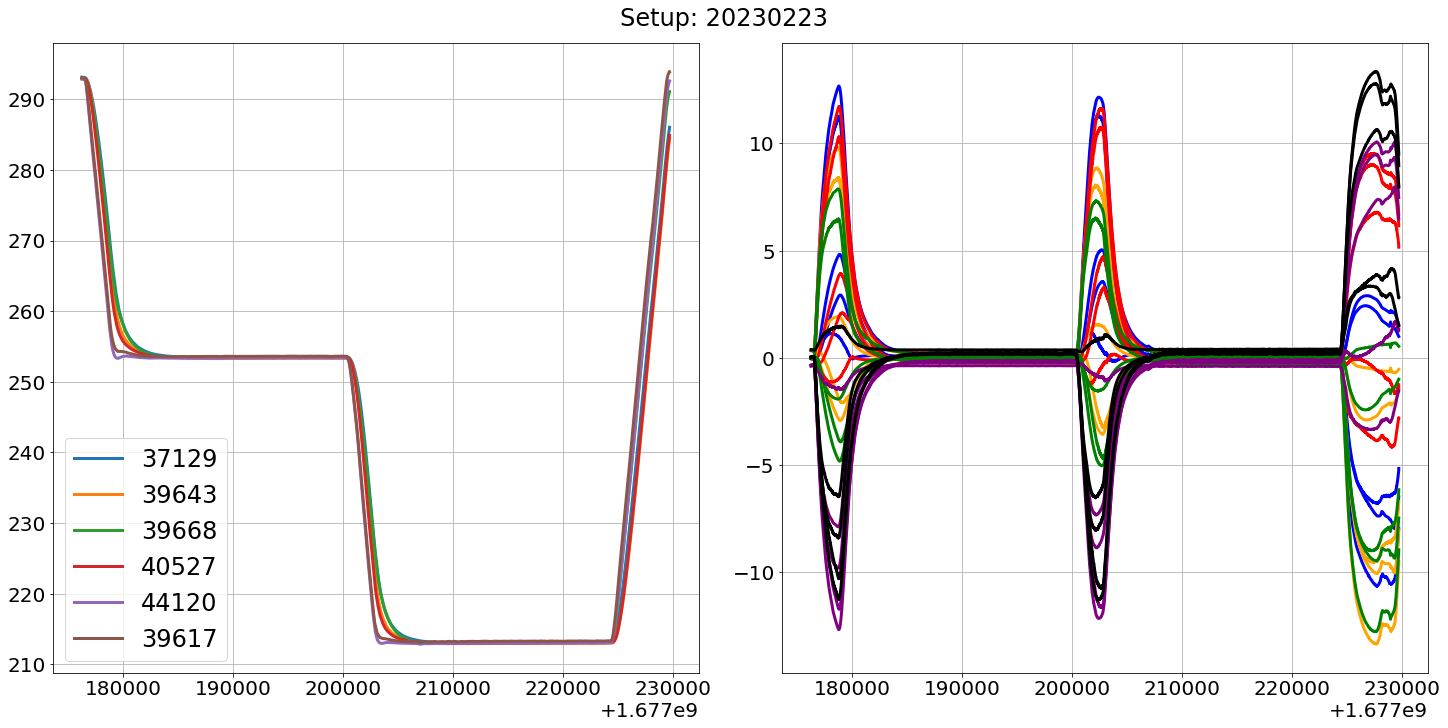

In [90]:
date = "20230223"
ids = {"T1":"37129", "T2":"39643", "T3":"39668", "T4":"40527", "T5":"44120", "T6":"39617"}
colors = {"T1":"blue", "T2":"orange", "T3":"red", "T4":"green", "T5":"purple", "T6":"black"}
def plot_temperature_profile(date, ids):
    rtds = getters.get_raw_data(path_to_split=path+date+"/",
                                filetype="temperature",
                                pol="Temp").sort_values(by="Timestamp").reset_index(drop=True)
    fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
    fig.set_size_inches(20, 10)
    fig.suptitle("Setup: " + date)
    for sens in ids.keys():
        axes[0].plot(rtds["Timestamp"], rtds[sens], label=ids[sens])
        for ref in ids.keys():
            if ref == sens:
                continue
            cc = line(rtds[ref], rtdcalib[ids[ref]][ids[sens]][0], rtdcalib[ids[ref]][ids[sens]][1])
            axes[1].plot(rtds["Timestamp"], rtds[sens]-rtds[ref] - cc, label=ids[sens] + " - " + ids[ref], color=colors[sens])
    axes[0].legend()
plot_temperature_profile(date, ids)

Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]
No handles with labels found to put in legend.


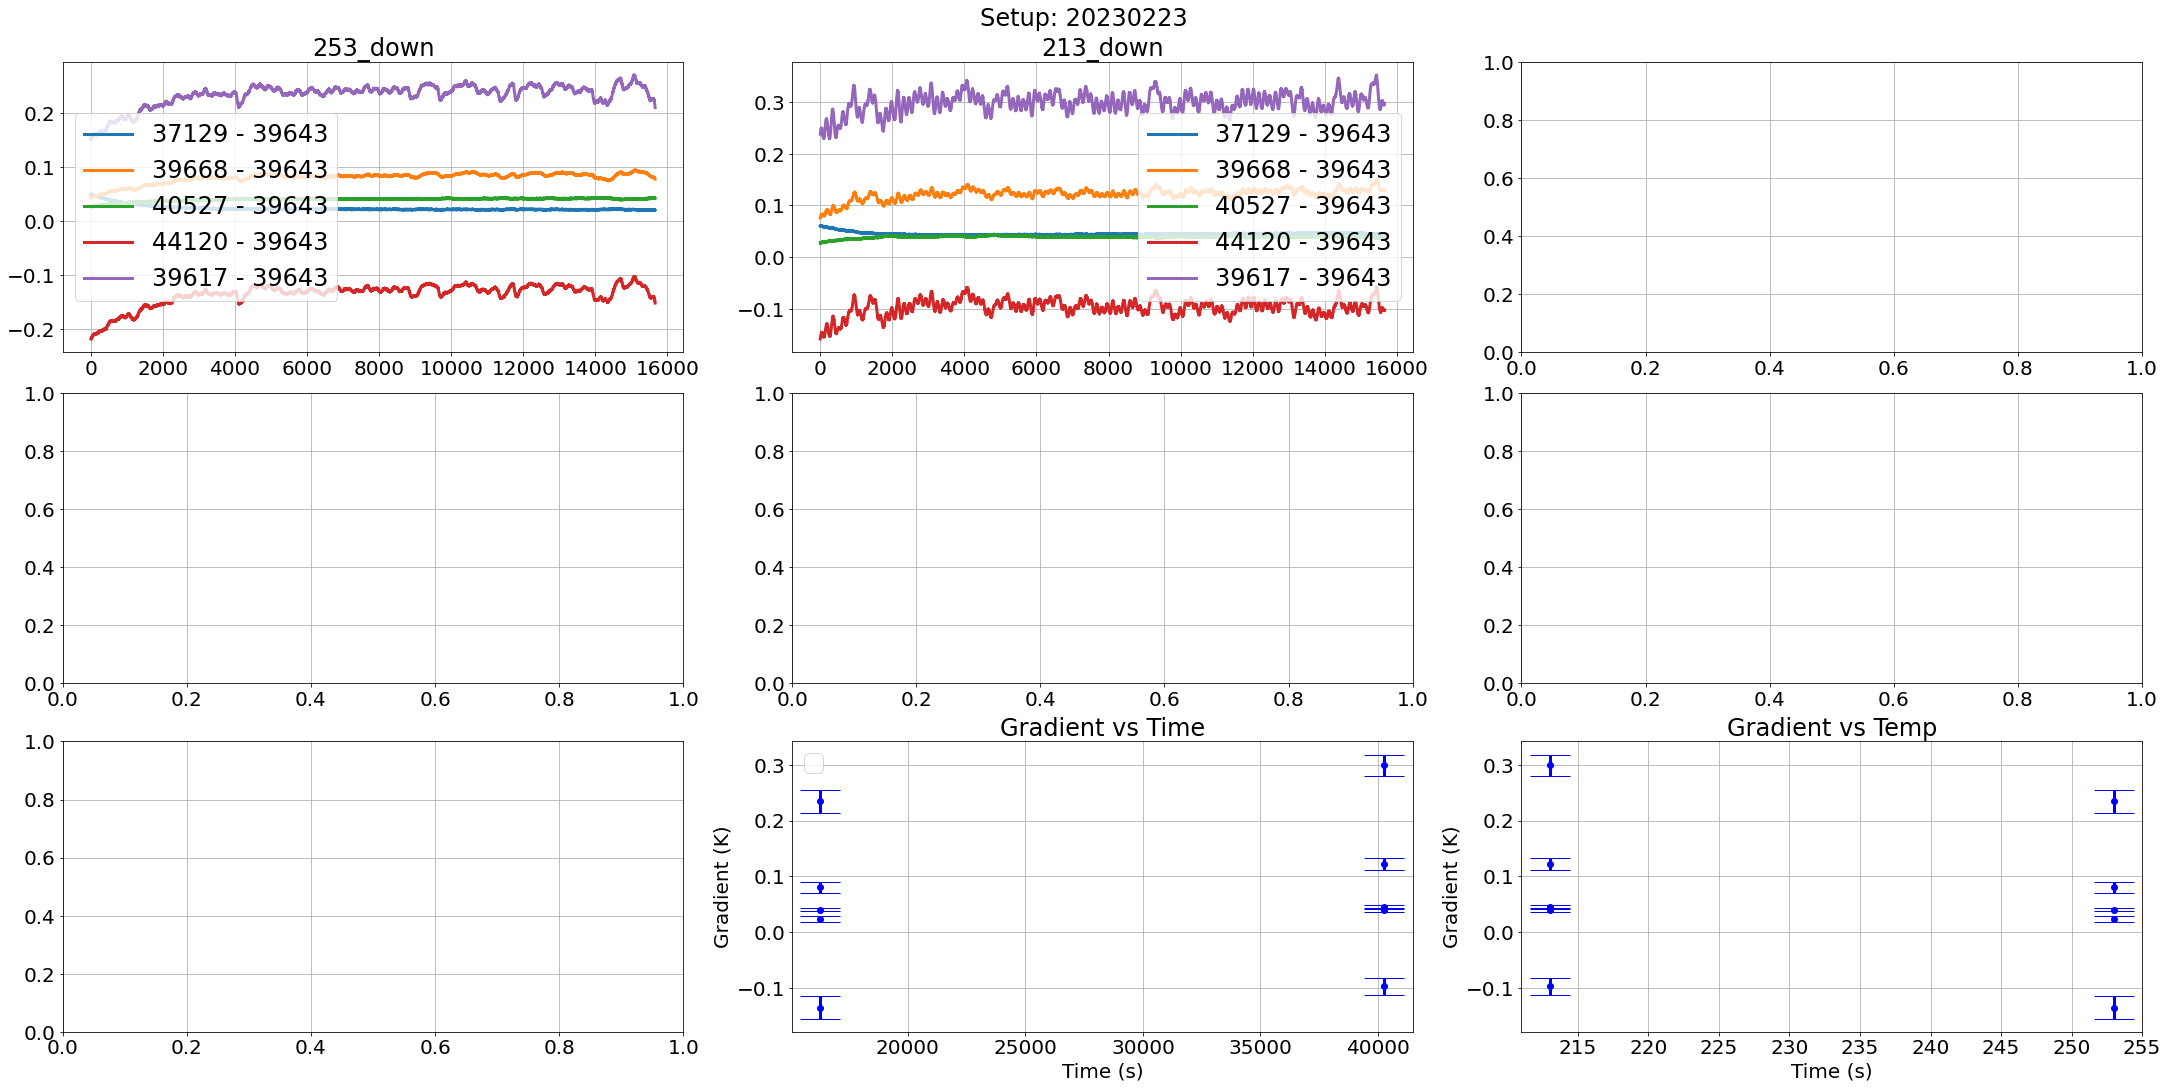

In [22]:
date = "20230223"
ids = {"T1":"37129", "T2":"39643", "T3":"39668", "T4":"40527", "T5":"44120", "T6":"39617"}
colors = {"T1":"blue", "T2":"orange", "T3":"red", "T4":"green", "T5":"purple", "T6":"black"}
plot_temperature_plateau(date, ids)

## 20230224 ##
# Description of the setup #
The 20230224 setup description can be found below:
* A total of 6 RTDs were connected.
* RTD1 was placed on the top position, close to the top of the cylinder.
* RTD2 was placed just behind the FBGs, close to the bottom part of the copper cylinder.

Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 15.98it/s]


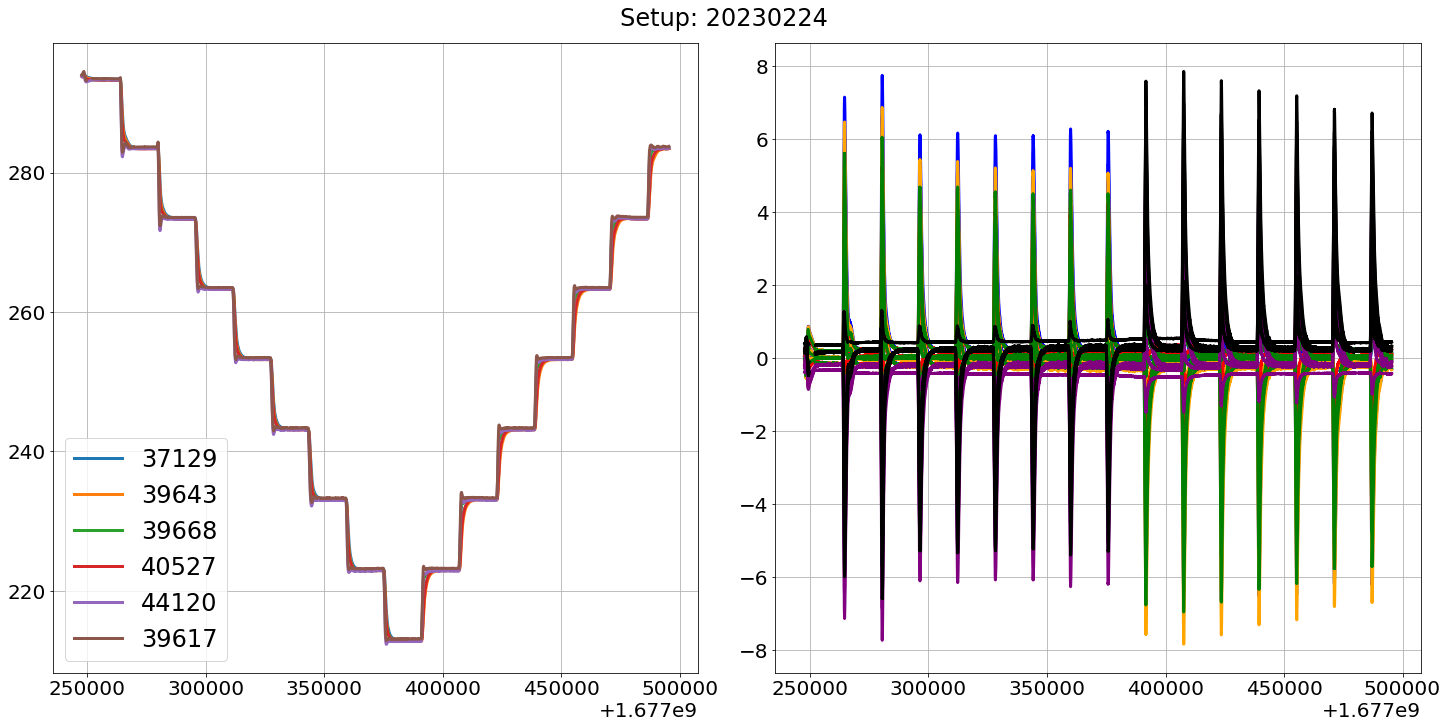

In [91]:
date = "20230224"
ids = {"T1":"37129", "T2":"39643", "T3":"39668", "T4":"40527", "T5":"44120", "T6":"39617"}
colors = {"T1":"blue", "T2":"orange", "T3":"red", "T4":"green", "T5":"purple", "T6":"black"}
def plot_temperature_profile(date, ids):
    rtds = getters.get_raw_data(path_to_split=path+date+"/",
                                filetype="temperature",
                                pol="Temp").sort_values(by="Timestamp").reset_index(drop=True)
    fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
    fig.set_size_inches(20, 10)
    fig.suptitle("Setup: " + date)
    for sens in ids.keys():
        axes[0].plot(rtds["Timestamp"], rtds[sens], label=ids[sens])
        for ref in ids.keys():
            if ref == sens:
                continue
            cc = line(rtds[ref], rtdcalib[ids[ref]][ids[sens]][0], rtdcalib[ids[ref]][ids[sens]][1])
            axes[1].plot(rtds["Timestamp"], rtds[sens]-rtds[ref] - cc, label=ids[sens] + " - " + ids[ref], color=colors[sens])
    axes[0].legend()
plot_temperature_profile(date, ids)

Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]


Index(['Date', 'Time', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'Timestamp'], dtype='object')


No handles with labels found to put in legend.


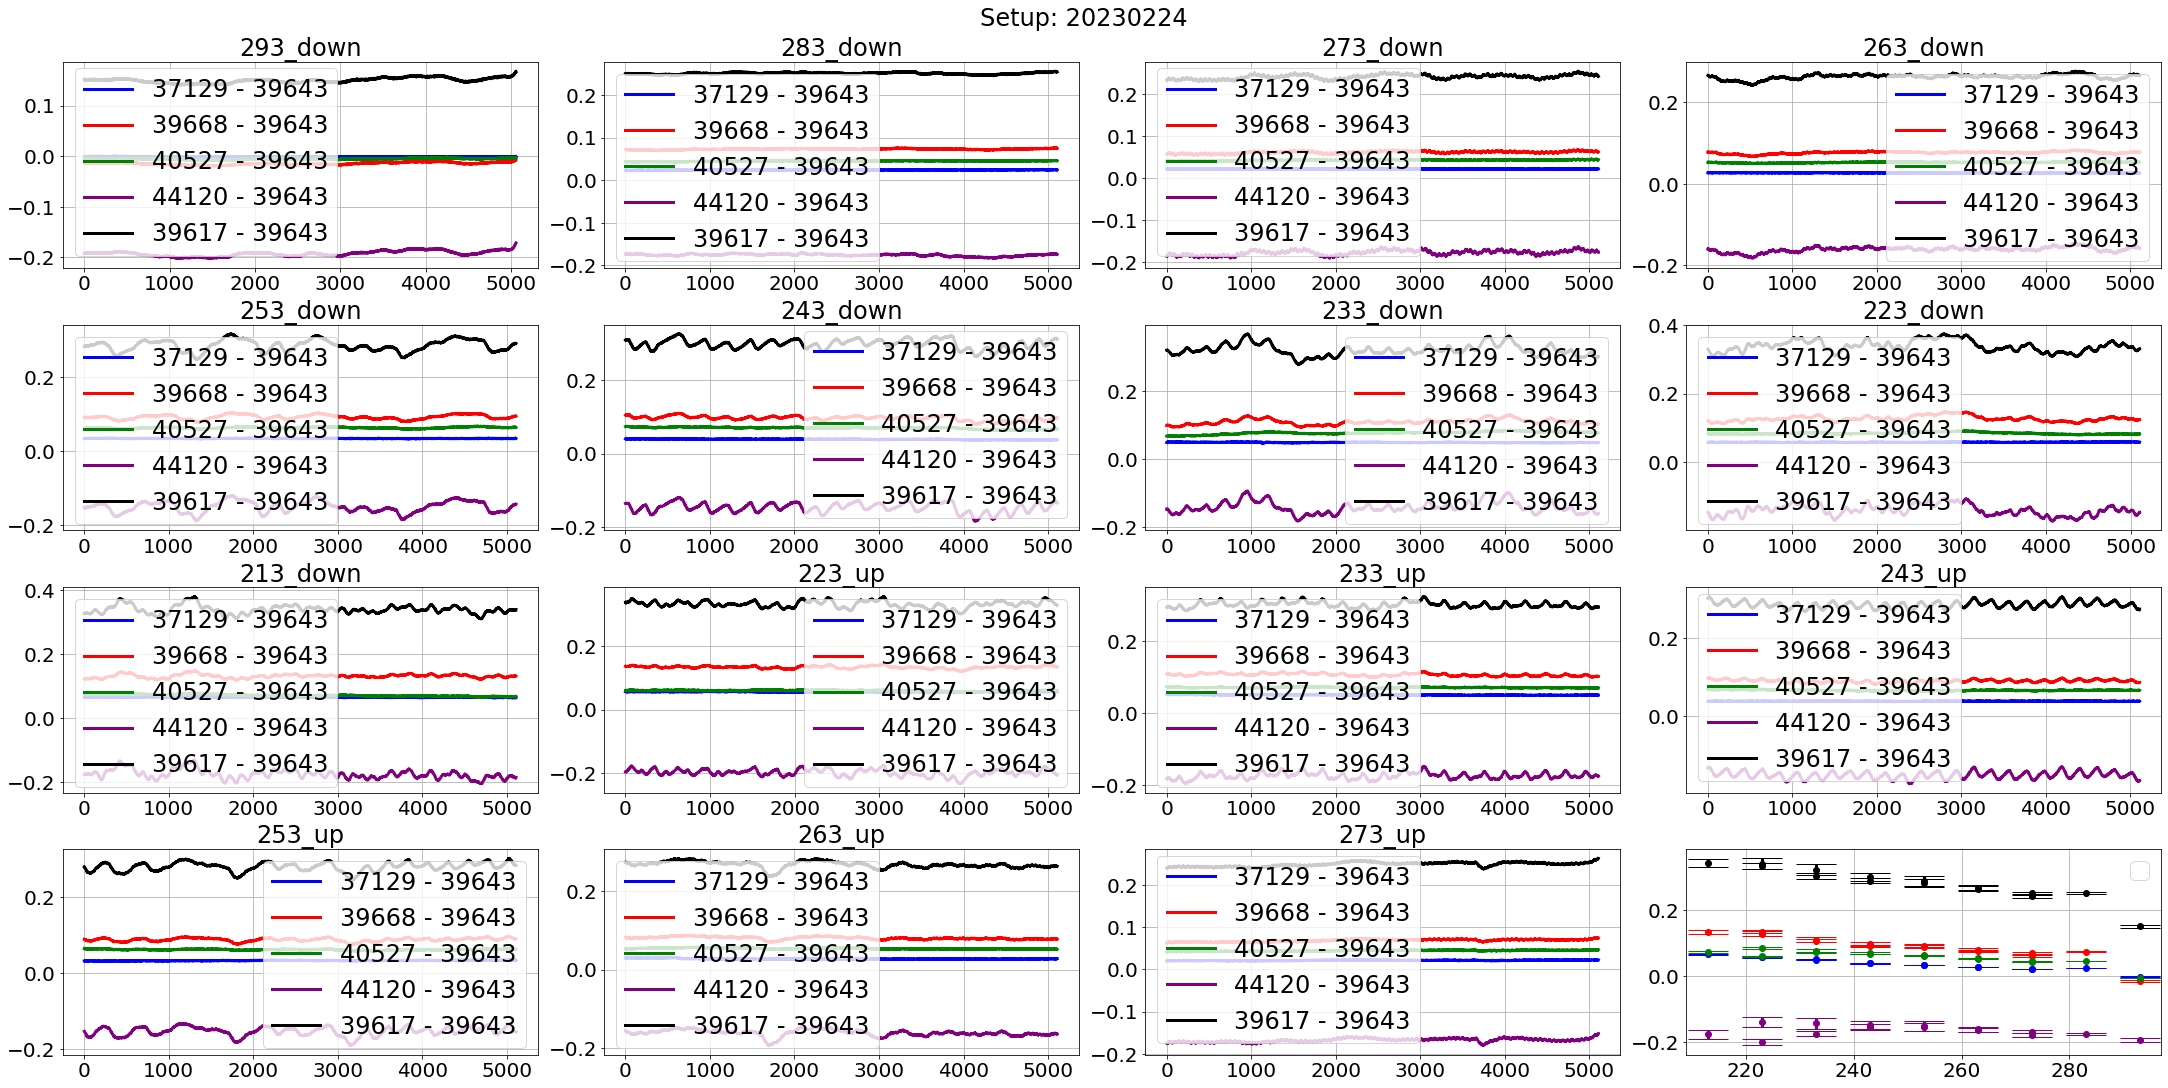

In [23]:
date = "20230224"
ids = {"T1":"37129", "T2":"39643", "T3":"39668", "T4":"40527", "T5":"44120", "T6":"39617"}
colors = {"T1":"blue", "T2":"orange", "T3":"red", "T4":"green", "T5":"purple", "T6":"black"}
def plot_temperature_plateau(date, ids):
    rtds = getters.get_raw_data(path_to_split=path+date+"/",
                                filetype="temperature",
                                pol="Temp").sort_values(by="Timestamp").reset_index(drop=True)
    print(rtds.columns)
    fig, axes = graphic_tools.make_figure(ncols=4, nrows=4)
    fig.set_size_inches(30, 15)
    fig.suptitle("Setup: " + date)
    cnt = 0
    ref = "T2"
    for plateau in plateaus[date]:
        for sens in ids.keys():
            if sens == ref:
                continue
            if plateau != "293_down":
                t0 = plateaus[date][plateau][0] + 10000
                tf = plateaus[date][plateau][1] - 250
            else:
                t0 = plateaus[date][plateau][0]
                tf = plateaus[date][plateau][1]
            tcut = rtds.loc[(rtds["Timestamp"]>t0)&(rtds["Timestamp"]<tf)]
            cc = line(int(plateau.split("_")[0]), rtdcalib[ids[ref]][ids[sens]][0], rtdcalib[ids[ref]][ids[sens]][1])
            axes[cnt].plot(tcut["Timestamp"]-t0, tcut[sens]-tcut[ref] - cc,
                           color=colors[sens],
                           label=ids[sens] + " - " + ids[ref])
            axes[15].errorbar(int(plateau.split("_")[0]), np.mean(tcut[sens]-tcut[ref] - cc),
                             color=colors[sens],
                             linestyle="-.", fmt="o",
                             yerr=np.std(tcut[sens]-tcut[ref] - cc), capsize=20)
        axes[cnt].set_title(plateau)
        axes[cnt].legend()
        cnt += 1
    axes[15].legend()
plot_temperature_plateau(date, ids)